In [563]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [564]:
warnings.filterwarnings('ignore')

In [565]:
data = pd.read_csv("/content/LT.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-06-23,LT,EQ,2.00,500.0,745.0,150.0,638.00,635.95,627.71,2699293,1.694372e+14,NaN,395612,0.1466
1,2004-06-24,LT,EQ,635.95,630.0,630.0,608.4,612.00,616.00,618.21,913575,5.647802e+13,NaN,305751,0.3347
2,2004-06-25,LT,EQ,616.00,619.0,679.0,616.1,665.00,668.30,658.45,1637383,1.078136e+14,NaN,217950,0.1331
3,2004-06-28,LT,EQ,668.30,660.0,671.9,640.2,653.00,656.40,657.39,913349,6.004271e+13,NaN,194984,0.2135
4,2004-06-29,LT,EQ,656.40,656.0,683.4,653.0,666.85,671.70,675.11,743063,5.016488e+13,NaN,101786,0.1370


In [566]:
data.drop(['Date'], axis=1, inplace=True)

In [567]:
print(data.head())
print(data.shape)
print(data.columns)

  Symbol Series  Prev Close   Open   High    Low    Last   Close    VWAP  \
0     LT     EQ        2.00  500.0  745.0  150.0  638.00  635.95  627.71   
1     LT     EQ      635.95  630.0  630.0  608.4  612.00  616.00  618.21   
2     LT     EQ      616.00  619.0  679.0  616.1  665.00  668.30  658.45   
3     LT     EQ      668.30  660.0  671.9  640.2  653.00  656.40  657.39   
4     LT     EQ      656.40  656.0  683.4  653.0  666.85  671.70  675.11   

    Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  2699293  1.694372e+14     NaN              395612       0.1466  
1   913575  5.647802e+13     NaN              305751       0.3347  
2  1637383  1.078136e+14     NaN              217950       0.1331  
3   913349  6.004271e+13     NaN              194984       0.2135  
4   743063  5.016488e+13     NaN              101786       0.1370  
(4184, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trade

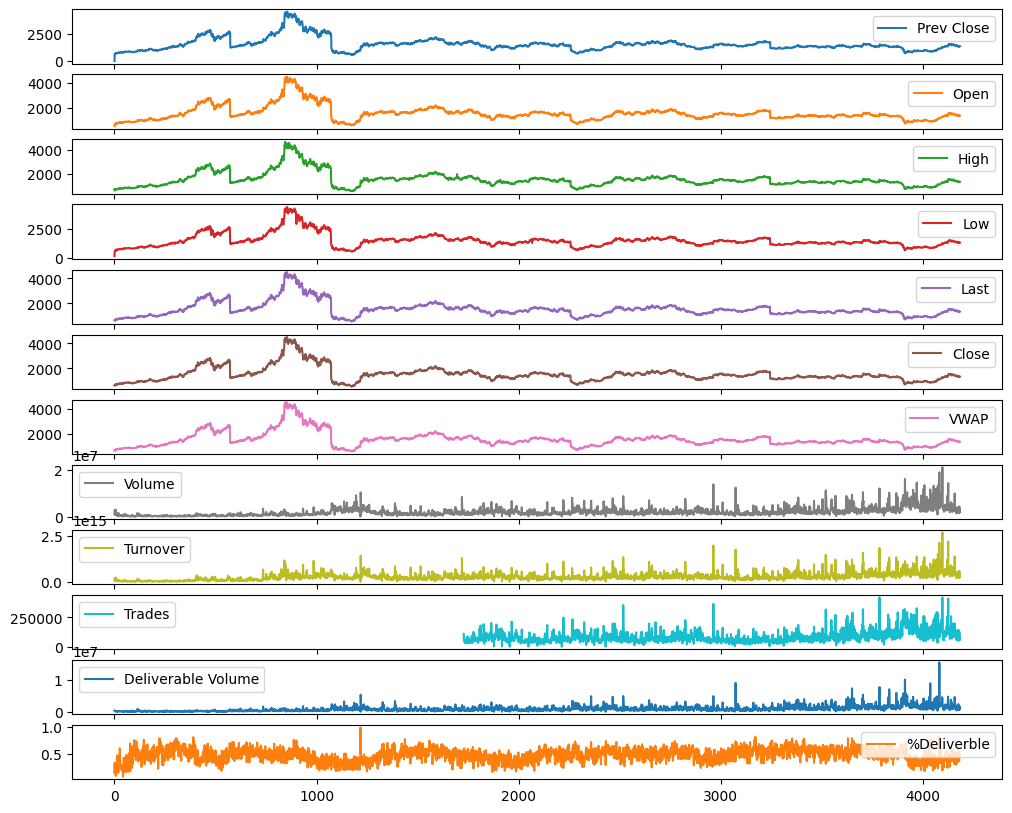

Symbol                   1
Series                   1
Prev Close            3873
Open                  2827
High                  3160
Low                   3270
Last                  3197
Close                 3873
VWAP                  4112
Volume                4180
Turnover              4184
Trades                2426
Deliverable Volume    4177
%Deliverble           2685
dtype: int64

In [568]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [569]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,LT,EQ,2.00,500.0,745.0,150.0,638.00,635.95,627.71,2699293,1.694372e+14,NaN,395612,0.1466
1,LT,EQ,635.95,630.0,630.0,608.4,612.00,616.00,618.21,913575,5.647802e+13,NaN,305751,0.3347
2,LT,EQ,616.00,619.0,679.0,616.1,665.00,668.30,658.45,1637383,1.078136e+14,NaN,217950,0.1331
3,LT,EQ,668.30,660.0,671.9,640.2,653.00,656.40,657.39,913349,6.004271e+13,NaN,194984,0.2135
4,LT,EQ,656.40,656.0,683.4,653.0,666.85,671.70,675.11,743063,5.016488e+13,NaN,101786,0.1370


     Symbol Series  Prev Close     Open     High     Low     Last    Close  \
0        LT     EQ        2.00   500.00   745.00   150.0   638.00   635.95   
1        LT     EQ      635.95   630.00   630.00   608.4   612.00   616.00   
2        LT     EQ      616.00   619.00   679.00   616.1   665.00   668.30   
3        LT     EQ      668.30   660.00   671.90   640.2   653.00   656.40   
4        LT     EQ      656.40   656.00   683.40   653.0   666.85   671.70   
...     ...    ...         ...      ...      ...     ...      ...      ...   
4179     LT     EQ     1322.90  1330.05  1341.20  1323.0  1339.00  1335.90   
4180     LT     EQ     1335.90  1339.00  1388.45  1335.9  1384.00  1380.65   
4181     LT     EQ     1380.65  1384.85  1399.95  1372.5  1374.15  1375.90   
4182     LT     EQ     1375.90  1383.95  1389.55  1353.5  1358.80  1358.65   
4183     LT     EQ     1358.65  1350.00  1365.00  1336.1  1340.05  1340.45   

         VWAP   Volume      Turnover    Trades  Deliverable Vol

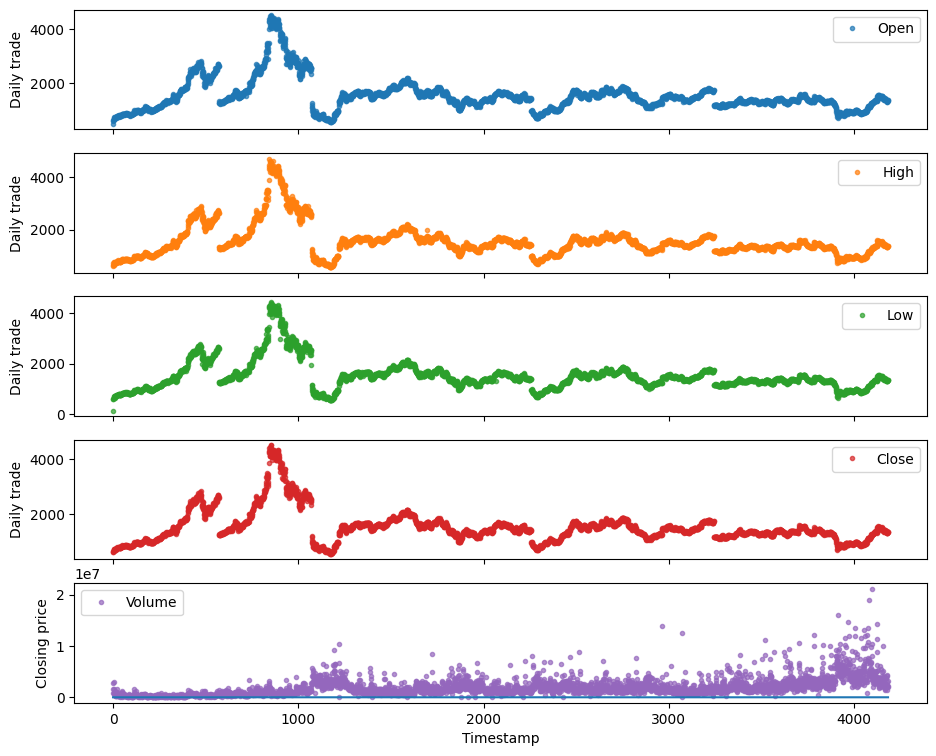

In [570]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [571]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1728
Deliverable Volume       0
%Deliverble              0
dtype: int64

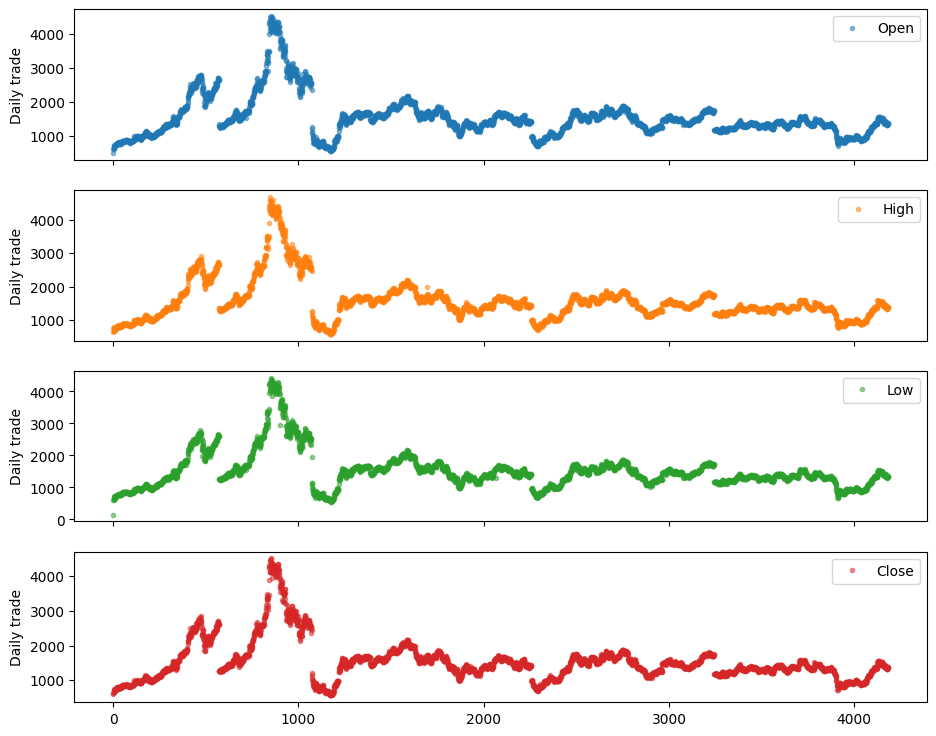

In [572]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

     Symbol Series  Prev Close     Open     High     Low     Last    Close  \
0        LT     EQ        2.00   500.00   745.00   150.0   638.00   635.95   
1        LT     EQ      635.95   630.00   630.00   608.4   612.00   616.00   
2        LT     EQ      616.00   619.00   679.00   616.1   665.00   668.30   
3        LT     EQ      668.30   660.00   671.90   640.2   653.00   656.40   
4        LT     EQ      656.40   656.00   683.40   653.0   666.85   671.70   
...     ...    ...         ...      ...      ...     ...      ...      ...   
4179     LT     EQ     1322.90  1330.05  1341.20  1323.0  1339.00  1335.90   
4180     LT     EQ     1335.90  1339.00  1388.45  1335.9  1384.00  1380.65   
4181     LT     EQ     1380.65  1384.85  1399.95  1372.5  1374.15  1375.90   
4182     LT     EQ     1375.90  1383.95  1389.55  1353.5  1358.80  1358.65   
4183     LT     EQ     1358.65  1350.00  1365.00  1336.1  1340.05  1340.45   

         VWAP   Volume      Turnover    Trades  Deliverable Vol

,count,mean,std,min,25%,50%,75%,max
Prev Close,4184.0,1.533954e+03,5.880745e+02,2.000000e+00,1.237213e+03,1.433100e+03,1.666713e+03,4.506700e+03
Open,4184.0,1.536559e+03,5.899938e+02,5.000000e+02,1.236488e+03,1.435025e+03,1.668350e+03,4.510000e+03
High,4184.0,1.559038e+03,6.022608e+02,5.834000e+02,1.255963e+03,1.455000e+03,1.685850e+03,4.690000e+03
Low,4184.0,1.511295e+03,5.749613e+02,1.500000e+02,1.220037e+03,1.413350e+03,1.646025e+03,4.430000e+03
Last,4184.0,1.534167e+03,5.875489e+02,5.643500e+02,1.237875e+03,1.434225e+03,1.667000e+03,4.512000e+03
Close,4184.0,1.534274e+03,5.876048e+02,5.620500e+02,1.237487e+03,1.433100e+03,1.666713e+03,4.506700e+03
VWAP,4184.0,1.535421e+03,5.882891e+02,5.697600e+02,1.239057e+03,1.434820e+03,1.665793e+03,4.509600e+03
Volume,4184.0,1.917127e+06,1.708891e+06,3.022900e+04,8.794398e+05,1.518669e+06,2.431827e+06,2.115335e+07
Turnover,4184.0,2.644572e+14,2.036930e+14,3.660836e+12,1.461543e+14,2.263673e+14,3.339506e+14,2.706056e+15
Trades,2456.0,8.569935e+04,4.800688e+04,2.308000e+03,5.408650e+04,7.414550e+04,1.018382e+05,4.208260e+05


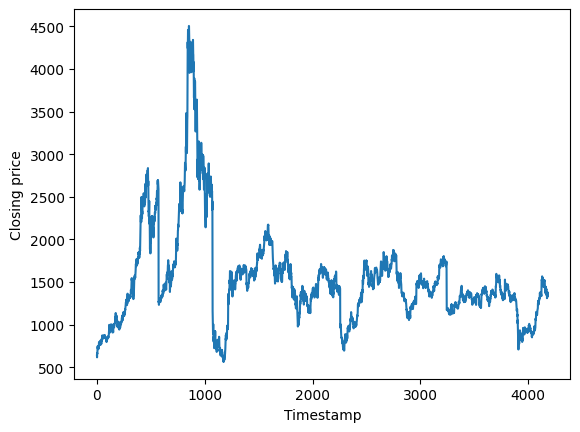

In [573]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [574]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3265
817


In [575]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
52/52 [==============================] - 4s 16ms/step - loss: 0.0467 - mse: 0.0467 - mae: 0.1441 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0725
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0568 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0477
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0418 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0350
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0365 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0321
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0332 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0319
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0312 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0319
Epoch 7/100
52/52 [==

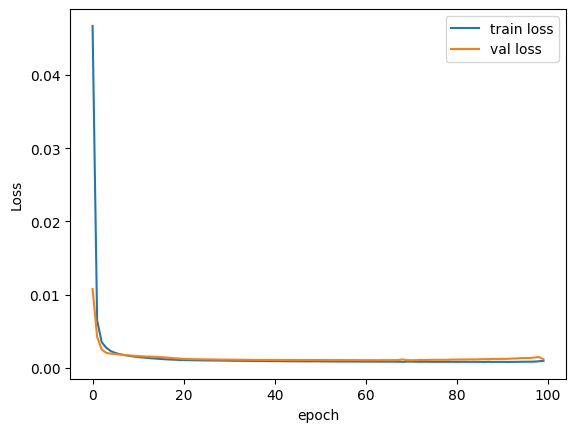

In [576]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

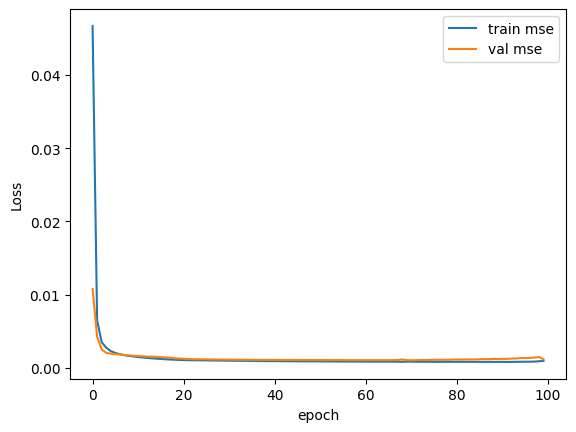

In [577]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

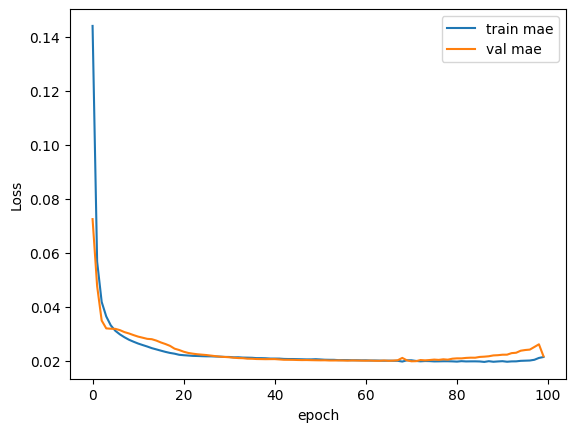

In [578]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_43 (LSTM)              (None, 32)                6272      
                                                                 
 dense_105 (Dense)           (None, 64)                2112      
                                                                 
 dense_106 (Dense)           (None, 64)                4160      
                                                                 
 activation_63 (Activation)  (None, 64)                0         
                                                                 
 dense_107 (Dense)           (None, 64)                4160      
                                                                 
 activation_64 (Activation)  (None, 64)              

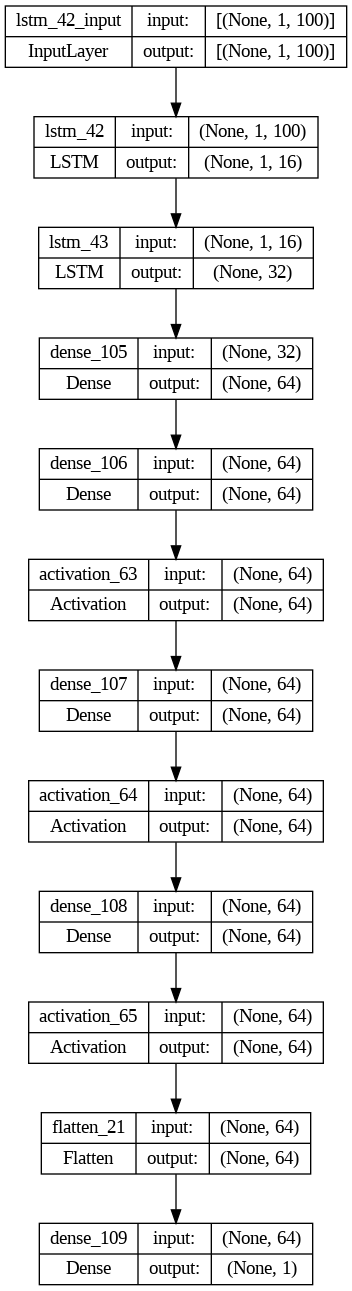

In [579]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [580]:
model.evaluate(test_X, test_Y)

26/26 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0217    


[0.0011940808035433292, 0.0011940808035433292, 0.021731700748205185]

In [581]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.991187
R2 Score: 0.990054
Max Error: 0.431874


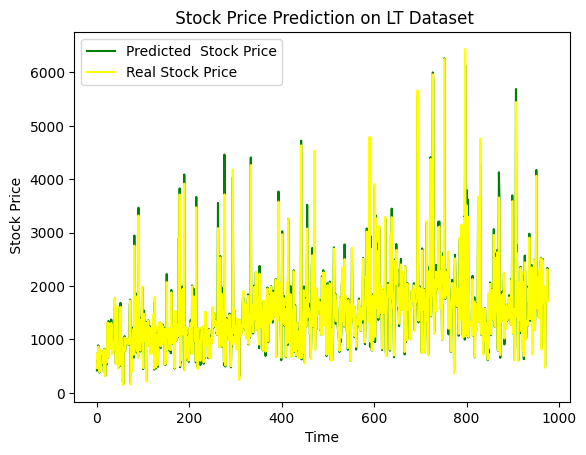

In [582]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on LT Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [583]:
predicted

array([[ 418.0153 ],
       [ 741.8454 ],
       [ 616.9488 ],
       [ 888.6964 ],
       [ 723.49225],
       [ 378.49622],
       [ 434.82544],
       [ 729.9967 ],
       [ 786.0314 ],
       [ 719.54626],
       [ 757.026  ],
       [ 743.49054],
       [ 725.08997],
       [ 517.78796],
       [ 786.80206],
       [ 396.69168],
       [ 824.4955 ],
       [ 748.83795],
       [ 315.53003],
       [ 765.58966],
       [ 760.29535],
       [ 532.98755],
       [ 694.1353 ],
       [1301.94   ],
       [ 656.5856 ],
       [1346.158  ],
       [ 864.562  ],
       [1041.8594 ],
       [ 935.77905],
       [ 835.1742 ],
       [ 956.92163],
       [1372.2301 ],
       [1238.9469 ],
       [ 753.17065],
       [ 908.26447],
       [ 853.7616 ],
       [ 800.8925 ],
       [ 803.4802 ],
       [1185.5107 ],
       [1763.4458 ],
       [ 865.0008 ],
       [ 541.04224],
       [1064.868  ],
       [ 859.6409 ],
       [1595.1632 ],
       [1178.6366 ],
       [ 460.3194 ],
       [ 600.

In [584]:
test_label

array([[ 460.96164782],
       [ 742.88645756],
       [ 625.95521503],
       [ 868.78183062],
       [ 726.74392624],
       [ 387.84161058],
       [ 411.87235513],
       [ 723.4858742 ],
       [ 801.78320611],
       [ 725.40384727],
       [ 764.49176258],
       [ 742.76087835],
       [ 735.62003124],
       [ 556.13192666],
       [ 790.87616027],
       [ 394.68217718],
       [ 815.18326063],
       [ 738.79172853],
       [ 310.37396362],
       [ 783.15250167],
       [ 764.23097991],
       [ 558.93206951],
       [ 678.69004621],
       [1313.73574255],
       [ 661.39585686],
       [1309.88982162],
       [ 868.59424249],
       [1042.30680132],
       [ 938.07771498],
       [ 831.99494003],
       [ 955.59849547],
       [1308.91291122],
       [1255.00274574],
       [ 724.92886226],
       [ 951.96046512],
       [ 853.62585898],
       [ 793.98409627],
       [ 799.94147247],
       [1188.3759349 ],
       [1779.02027833],
       [ 870.38014784],
       [ 534.526

In [585]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      460.961648       418.015289
1      742.886458       741.845398
2      625.955215       616.948792
3      868.781831       888.696411
4      726.743926       723.492249
..            ...              ...
972   1965.026715      1955.121704
973   1839.993599      1865.378540
974   1950.915789      1971.483398
975   2315.338637      2338.742920
976   1713.434163      1749.784424

[977 rows x 2 columns]


In [586]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 460.9616478234379  | 418.0152893066406  |
|  1  | 742.8864575570761  | 741.8453979492188  |
|  2  | 625.9552150334216  | 616.9487915039062  |
|  3  | 868.7818306180823  | 888.6964111328125  |
|  4  | 726.7439262419695  | 723.4922485351562  |
|  5  | 387.84161057546544 | 378.4962158203125  |
|  6  | 411.87235512565854 |  434.825439453125  |
|  7  | 723.4858741965769  | 729.9967041015625  |
|  8  | 801.7832061068701  | 786.0313720703125  |
|  9  |  725.403847267463  | 719.5462646484375  |
| 10  |  764.49176258181   | 757.0260009765625  |
| 11  | 742.7608783496386  | 743.4905395507812  |
| 12  | 735.6200312445756  | 725.0899658203125  |
| 13  | 556.1319266618868  | 517.7879638671875  |
| 14  | 790.8761602671119  | 786.8020629882812  |
| 15  | 394.6821771814635  | 396.6916809082031  |
| 16  | 815.1832606324973  | 824.4954833984375  |


In [587]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_43 (LSTM)              (None, 32)                6272      
                                                                 
 dense_105 (Dense)           (None, 64)                2112      
                                                                 
 dense_106 (Dense)           (None, 64)                4160      
                                                                 
 activation_63 (Activation)  (None, 64)                0         
                                                                 
 dense_107 (Dense)           (None, 64)                4160      
                                                                 
 activation_64 (Activation)  (None, 64)              

In [588]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))